In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('dataset_for_analyst_assignment_20201120.csv')
df.head()

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
0,2019-09-01 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
1,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-09-02 00:00:00.000,2020-09-02 00:00:00.000,2,0.0,1.0,...,0.0,1.0,NaN,False,23.0,2.0,NaN,NaN,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
2,2019-09-01 00:00:00.000,DNK,19,19.0,0.0,2019-12-10 00:00:00.000,2020-05-25 00:00:00.000,3,0.0,4.0,...,19.0,0.0,NaN,True,21.0,2.0,9.0,3.0,6.559,"{\n ""General merchandise"": 1,\n ""Grocery"": 9..."
3,2019-09-01 00:00:00.000,FIN,0,NaN,NaN,NaN,NaN,4,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
4,2019-09-01 00:00:00.000,GRC,0,NaN,NaN,NaN,NaN,5,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


In [3]:
print ('The data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The data has 21983 rows and 30 columns


In [4]:
## check missing values
df.columns[df.isnull().any()]

Index(['PURCHASE_COUNT_DELIVERY', 'PURCHASE_COUNT_TAKEAWAY',
       'FIRST_PURCHASE_DAY', 'LAST_PURCHASE_DAY', 'BREAKFAST_PURCHASES',
       'LUNCH_PURCHASES', 'EVENING_PURCHASES', 'DINNER_PURCHASES',
       'LATE_NIGHT_PURCHASES', 'TOTAL_PURCHASES_EUR',
       'DISTINCT_PURCHASE_VENUE_COUNT', 'MIN_PURCHASE_VALUE_EUR',
       'MAX_PURCHASE_VALUE_EUR', 'AVG_PURCHASE_VALUE_EUR', 'PREFERRED_DEVICE',
       'IOS_PURCHASES', 'WEB_PURCHASES', 'ANDROID_PURCHASES',
       'PREFERRED_RESTAURANT_TYPES', 'MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE',
       'MOST_COMMON_WEEKDAY_TO_PURCHASE', 'AVG_DAYS_BETWEEN_PURCHASES',
       'MEDIAN_DAYS_BETWEEN_PURCHASES', 'AVERAGE_DELIVERY_DISTANCE_KMS'],
      dtype='object')

In [5]:
df[['PURCHASE_COUNT_DELIVERY','PURCHASE_COUNT_TAKEAWAY','BREAKFAST_PURCHASES','LUNCH_PURCHASES','EVENING_PURCHASES','DINNER_PURCHASES','LATE_NIGHT_PURCHASES','TOTAL_PURCHASES_EUR','DISTINCT_PURCHASE_VENUE_COUNT','MIN_PURCHASE_VALUE_EUR','MAX_PURCHASE_VALUE_EUR','AVG_PURCHASE_VALUE_EUR']]=df[['PURCHASE_COUNT_DELIVERY','PURCHASE_COUNT_TAKEAWAY','BREAKFAST_PURCHASES','LUNCH_PURCHASES','EVENING_PURCHASES','DINNER_PURCHASES','LATE_NIGHT_PURCHASES','TOTAL_PURCHASES_EUR','DISTINCT_PURCHASE_VENUE_COUNT','MIN_PURCHASE_VALUE_EUR','MAX_PURCHASE_VALUE_EUR','AVG_PURCHASE_VALUE_EUR']].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21983 entries, 0 to 21982
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   REGISTRATION_DATE                        21983 non-null  object 
 1   REGISTRATION_COUNTRY                     21983 non-null  object 
 2   PURCHASE_COUNT                           21983 non-null  int64  
 3   PURCHASE_COUNT_DELIVERY                  21983 non-null  float64
 4   PURCHASE_COUNT_TAKEAWAY                  21983 non-null  float64
 5   FIRST_PURCHASE_DAY                       11964 non-null  object 
 6   LAST_PURCHASE_DAY                        12027 non-null  object 
 7   USER_ID                                  21983 non-null  int64  
 8   BREAKFAST_PURCHASES                      21983 non-null  float64
 9   LUNCH_PURCHASES                          21983 non-null  float64
 10  EVENING_PURCHASES                        21983

In [6]:
# Selecting duplicate rows except first 
# occurrence based on all columns
duplicate = df[df.duplicated()]
print("Duplicate Rows:", duplicate.shape[0])

Duplicate Rows: 0


In [7]:
df['MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE'] = df['MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE'].astype('object')
df['MOST_COMMON_WEEKDAY_TO_PURCHASE'] = df['MOST_COMMON_WEEKDAY_TO_PURCHASE'].astype('object')

In [8]:
df[(df['PURCHASE_COUNT'] > 0) & df['LAST_PURCHASE_DAY'].isnull()]

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
20978,2019-09-29 00:00:00.000,FIN,1,1.0,0.0,NaN,NaN,20979,0.0,1.0,...,0.0,0.0,NaN,False,3.0,6.0,NaN,NaN,5.087,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


In [9]:
df = df[df['USER_ID'] != 20979]
df['PURCHASE_COUNT_BY_STORE_TYPE'] = df['PURCHASE_COUNT_BY_STORE_TYPE'].map(lambda x: dict(eval(x)))
df[['General merchandise','Grocery','Pet supplies','Restaurant','Retail store']]= df['PURCHASE_COUNT_BY_STORE_TYPE'].apply(pd.Series)

In [10]:
## separate variables into new data frames
numeric_data = df.select_dtypes(include=[np.number])
cat_data = df.select_dtypes(exclude=[np.number])

del numeric_data['USER_ID']  
del cat_data['PURCHASE_COUNT_BY_STORE_TYPE']
del cat_data['FIRST_PURCHASE_DAY']
del cat_data['LAST_PURCHASE_DAY']
del cat_data['PREFERRED_RESTAURANT_TYPES']
del cat_data['REGISTRATION_DATE']

print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],cat_data.shape[1]))

There are 24 numeric and 5 categorical columns in train data


In [11]:
## No late night purchases!!
numeric_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PURCHASE_COUNT,21982.0,3.345464,8.523350,0.000,0.00,1.000,3.000,320.000
PURCHASE_COUNT_DELIVERY,21982.0,3.141661,8.301183,0.000,0.00,1.000,3.000,320.000
PURCHASE_COUNT_TAKEAWAY,21982.0,0.203803,1.063922,0.000,0.00,0.000,0.000,44.000
BREAKFAST_PURCHASES,21982.0,0.106132,0.822365,0.000,0.00,0.000,0.000,52.000
LUNCH_PURCHASES,21982.0,1.299518,4.326355,0.000,0.00,0.000,1.000,171.000
EVENING_PURCHASES,21982.0,0.269994,1.374086,0.000,0.00,0.000,0.000,71.000
DINNER_PURCHASES,21982.0,1.657402,4.157727,0.000,0.00,0.000,1.000,104.000
LATE_NIGHT_PURCHASES,21982.0,0.000000,0.000000,0.000,0.00,0.000,0.000,0.000
TOTAL_PURCHASES_EUR,21982.0,96.416180,237.988780,0.000,0.00,16.192,87.791,7979.620
DISTINCT_PURCHASE_VENUE_COUNT,21982.0,1.816395,3.239236,0.000,0.00,1.000,2.000,71.000


In [12]:
cat_data.describe().transpose()

,count,unique,top,freq
REGISTRATION_COUNTRY,21982,59,FIN,10276
PREFERRED_DEVICE,21909,3,ios,9746
USER_HAS_VALID_PAYMENT_METHOD,21982,2,False,14414
MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,12027.0,24.0,18.0,543.0
MOST_COMMON_WEEKDAY_TO_PURCHASE,12027.0,7.0,7.0,1778.0


In [13]:
cat_data['REGISTRATION_COUNTRY'].value_counts().head(5)

REGISTRATION_COUNTRY
FIN    10276
DNK     8081
GRC     3042
USA       70
GBR       54
Name: count, dtype: int64

In [14]:
cat_data['REGISTRATION_COUNTRY'].value_counts(normalize=True).mul(100).head(5)

REGISTRATION_COUNTRY
FIN    46.747339
DNK    36.761896
GRC    13.838595
USA     0.318442
GBR     0.245656
Name: proportion, dtype: float64

In [15]:
cat_data['PREFERRED_DEVICE'].value_counts(normalize=True).mul(100)

PREFERRED_DEVICE
ios        44.484002
android    38.559496
web        16.956502
Name: proportion, dtype: float64

In [16]:
cat_data['USER_HAS_VALID_PAYMENT_METHOD'].value_counts(normalize=True).mul(100)

USER_HAS_VALID_PAYMENT_METHOD
False    65.571831
True     34.428169
Name: proportion, dtype: float64

In [17]:
df['PURCHASE_COUNT_FLAG'] = np.where(((df['PURCHASE_COUNT_DELIVERY'] > 0) & (df['PURCHASE_COUNT_TAKEAWAY'] > 0))==True,'Both',
                                    np.where(df['PURCHASE_COUNT_DELIVERY'] > 0,'Delivery',np.where(df['PURCHASE_COUNT_TAKEAWAY']>0,'Takeaway','NO_PURCHASE')))

In [18]:
df[df['PURCHASE_COUNT']>0]['PURCHASE_COUNT_FLAG'].value_counts(normalize=True).mul(100)

PURCHASE_COUNT_FLAG
Delivery    83.079737
Both        13.428120
Takeaway     3.492143
Name: proportion, dtype: float64

In [19]:
df['PURCHASE_CUST'] = np.where(df['PURCHASE_COUNT'] > 0,'PURCHASE','NO_PURCHASE')

In [20]:
df['PURCHASE_CUST'].value_counts(normalize=True).mul(100)

PURCHASE_CUST
PURCHASE       54.712947
NO_PURCHASE    45.287053
Name: proportion, dtype: float64

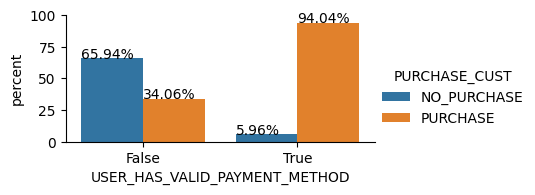

In [21]:
x, y = 'USER_HAS_VALID_PAYMENT_METHOD', 'PURCHASE_CUST' 
df1 = df.groupby('USER_HAS_VALID_PAYMENT_METHOD')['PURCHASE_CUST'].value_counts(normalize = True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x = x, y = 'percent',hue = y, kind = 'bar', data = df1, height = 2, aspect = 2)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

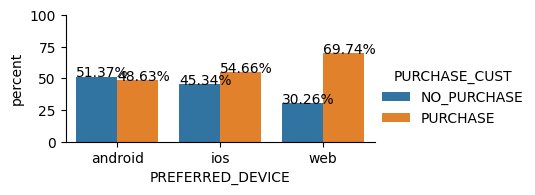

In [22]:
x, y = 'PREFERRED_DEVICE', 'PURCHASE_CUST' 
df1 = df.groupby('PREFERRED_DEVICE')['PURCHASE_CUST'].value_counts(normalize = True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x = x, y = 'percent',hue = y, kind = 'bar', data = df1, height = 2, aspect = 2)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

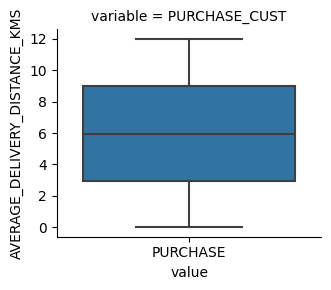

In [23]:
def boxplot(x,y,**kwargs):
            sns.boxplot(x=x,y=y)
            x = plt.xticks()

cat = ['PURCHASE_CUST']
df1 = df[df['PURCHASE_COUNT']>0]
p = pd.melt(df1, id_vars='AVERAGE_DELIVERY_DISTANCE_KMS', value_vars=cat)
g = sns.FacetGrid (p, col='variable', col_wrap=3, sharex=False, sharey=False)
g = g.map(boxplot, 'value','AVERAGE_DELIVERY_DISTANCE_KMS')
g

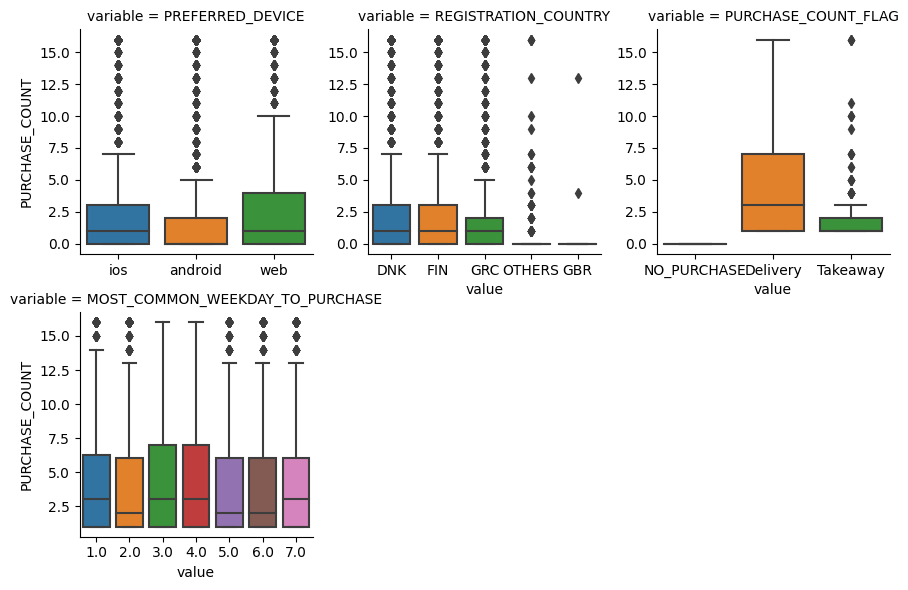

In [24]:
cat = ['PREFERRED_DEVICE','REGISTRATION_COUNTRY','PURCHASE_COUNT_FLAG','MOST_COMMON_WEEKDAY_TO_PURCHASE']

df1 = df.copy()
df1['REGISTRATION_COUNTRY'] = np.where(df1['REGISTRATION_COUNTRY'].isin(['FIN','DNK','GRC','GBR']),df1['REGISTRATION_COUNTRY'],'OTHERS')
df1['PURCHASE_COUNT_FLAG'] = np.where(df1['PURCHASE_COUNT_DELIVERY'] > 0,'Delivery',np.where(df1['PURCHASE_COUNT_TAKEAWAY']>0,'Takeaway','NO_PURCHASE'))
## Capping the outlier rows with Percentiles
upper_lim = df1['PURCHASE_COUNT'].quantile(.95)
lower_lim = df1['PURCHASE_COUNT'].quantile(.05)
df1.loc[(df1['PURCHASE_COUNT'] > upper_lim),'PURCHASE_COUNT'] = upper_lim
df1.loc[(df1['PURCHASE_COUNT'] < lower_lim),'PURCHASE_COUNT'] = lower_lim

p = pd.melt(df1, id_vars='PURCHASE_COUNT', value_vars=cat)
g = sns.FacetGrid (p, col='variable', col_wrap=3, sharex=False, sharey=False)
g = g.map(boxplot, 'value','PURCHASE_COUNT')
g

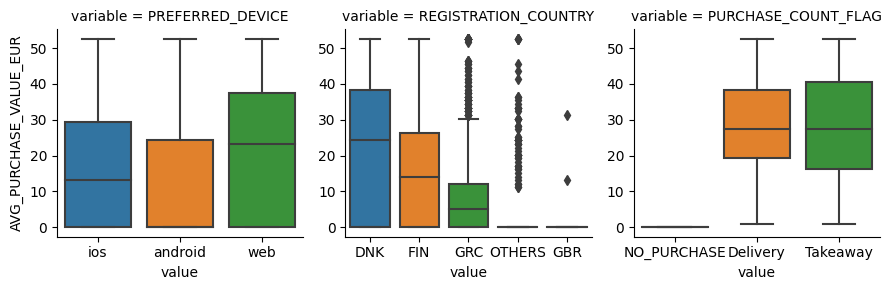

In [25]:
cat = ['PREFERRED_DEVICE','REGISTRATION_COUNTRY','PURCHASE_COUNT_FLAG']

## Capping the outlier rows with Percentiles
upper_lim = df1['AVG_PURCHASE_VALUE_EUR'].quantile(.95)
lower_lim = df1['AVG_PURCHASE_VALUE_EUR'].quantile(.05)
df1.loc[(df1['AVG_PURCHASE_VALUE_EUR'] > upper_lim),'AVG_PURCHASE_VALUE_EUR'] = upper_lim
df1.loc[(df1['AVG_PURCHASE_VALUE_EUR'] < lower_lim),'AVG_PURCHASE_VALUE_EUR'] = lower_lim

p = pd.melt(df1, id_vars='AVG_PURCHASE_VALUE_EUR', value_vars=cat)
g = sns.FacetGrid (p, col='variable', col_wrap=3, sharex=False, sharey=False)
g = g.map(boxplot, 'value','AVG_PURCHASE_VALUE_EUR')
g

In [26]:
df[['FIRST_PURCHASE_DAY', 'LAST_PURCHASE_DAY', 'PREFERRED_DEVICE',
       'IOS_PURCHASES', 'WEB_PURCHASES', 'ANDROID_PURCHASES',
       'PREFERRED_RESTAURANT_TYPES', 'MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE',
       'MOST_COMMON_WEEKDAY_TO_PURCHASE', 'AVG_DAYS_BETWEEN_PURCHASES',
       'MEDIAN_DAYS_BETWEEN_PURCHASES', 'AVERAGE_DELIVERY_DISTANCE_KMS']]=df[['FIRST_PURCHASE_DAY', 'LAST_PURCHASE_DAY', 'PREFERRED_DEVICE',
       'IOS_PURCHASES', 'WEB_PURCHASES', 'ANDROID_PURCHASES',
       'PREFERRED_RESTAURANT_TYPES', 'MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE',
       'MOST_COMMON_WEEKDAY_TO_PURCHASE', 'AVG_DAYS_BETWEEN_PURCHASES',
       'MEDIAN_DAYS_BETWEEN_PURCHASES', 'AVERAGE_DELIVERY_DISTANCE_KMS']].fillna('-1')
upper_lim = df['PURCHASE_COUNT'].quantile(.95)
lower_lim = df['PURCHASE_COUNT'].quantile(.05)
df.loc[(df['PURCHASE_COUNT'] > upper_lim),'PURCHASE_COUNT'] = upper_lim
df.loc[(df['PURCHASE_COUNT'] < lower_lim),'PURCHASE_COUNT'] = lower_lim
upper_lim = df['AVG_PURCHASE_VALUE_EUR'].quantile(.95)
lower_lim = df['AVG_PURCHASE_VALUE_EUR'].quantile(.05)
df.loc[(df['AVG_PURCHASE_VALUE_EUR'] > upper_lim),'AVG_PURCHASE_VALUE_EUR'] = upper_lim
df.loc[(df['AVG_PURCHASE_VALUE_EUR'] < lower_lim),'AVG_PURCHASE_VALUE_EUR'] = lower_lim

In [27]:
df['REGISTRATION_DATE'].max()

'2019-09-30 00:00:00.000'

In [28]:
df['LAST_PURCHASE_DAY'].max()

'2020-10-31 00:00:00.000'

### User segmentation that could be utilised by the marketing team to reactivate different kinds of users

In [29]:
## Considering current date: 2020-11-01
NOW = dt.datetime(2020,11,1)
df['recency'] = np.where(df['LAST_PURCHASE_DAY'] != '-1',(NOW - pd.to_datetime(df['LAST_PURCHASE_DAY'],errors='coerce')).dt.days,999)
df[df['LAST_PURCHASE_DAY'] != '-1']['recency'].describe()

count    12027.000000
mean       196.037166
std        160.544216
min          1.000000
25%         35.000000
50%        163.000000
75%        387.000000
max        427.000000
Name: recency, dtype: float64

#### Recency:  Number of days since the last purchase day

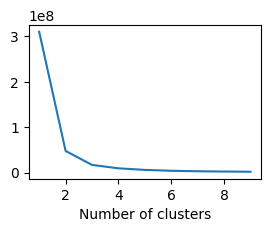

In [30]:
sse={}
##Customers with atleast one purchase
segment = df.copy()
segment = segment[segment['PURCHASE_COUNT']>0]
df_recency = segment[['recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_recency)
    df_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure(figsize=(3,2))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.show()

In [31]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(segment[['recency']])
segment['recency_cluster'] = kmeans.predict(segment[['recency']])

#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

segment = order_cluster('recency_cluster', 'recency', segment, False)
segment.groupby('recency_cluster')['recency'].describe()

,count,mean,std,min,25%,50%,75%,max
recency_cluster,,,,,,,,
0,4244.0,391.128652,34.854520,293.0,378.0,404.0,415.0,427.0
1,2640.0,194.051136,49.816739,115.0,153.0,188.0,236.0,292.0
2,5143.0,36.067276,31.519519,1.0,9.0,26.0,57.0,114.0


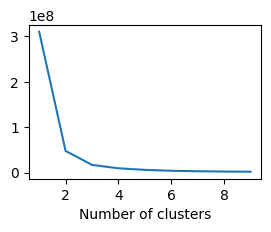

In [32]:
sse={}

df_purchase = segment[['PURCHASE_COUNT']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_recency)
    df_purchase["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure(figsize=(3,2))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.show()

In [33]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(segment[['PURCHASE_COUNT']])
segment['purchase_cluster'] = kmeans.predict(segment[['PURCHASE_COUNT']])

#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

segment = order_cluster('purchase_cluster', 'PURCHASE_COUNT', segment, False)
segment.groupby('purchase_cluster')['PURCHASE_COUNT'].describe()

,count,mean,std,min,25%,50%,75%,max
purchase_cluster,,,,,,,,
0,7982.0,1.829617,1.028005,1.0,1.0,1.0,2.0,4.0
1,2390.0,7.241841,1.917536,5.0,6.0,7.0,9.0,11.0
2,1655.0,15.197583,1.355804,12.0,15.0,16.0,16.0,16.0


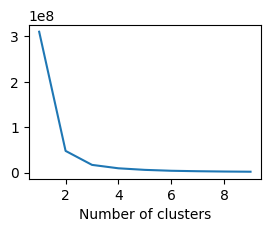

In [34]:
sse={}

df_avg_purchase = segment[['AVG_PURCHASE_VALUE_EUR']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_recency)
    df_avg_purchase["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure(figsize=(3,2))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.show()

In [35]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(segment[['AVG_PURCHASE_VALUE_EUR']])
segment['avg_purchaseval_cluster'] = kmeans.predict(segment[['AVG_PURCHASE_VALUE_EUR']])

#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

segment = order_cluster('avg_purchaseval_cluster', 'AVG_PURCHASE_VALUE_EUR', segment, False)
segment.groupby('avg_purchaseval_cluster')['AVG_PURCHASE_VALUE_EUR'].describe()

,count,mean,std,min,25%,50%,75%,max
avg_purchaseval_cluster,,,,,,,,
0,4565.0,16.335653,5.174062,1.012,12.144,17.204,20.240,23.276
1,4811.0,30.877674,4.565851,24.288,27.324,30.360,34.408,39.468
2,2651.0,48.358025,4.488244,40.480,44.528,49.588,52.624,52.624


###  Overall score : Recency cluster +  Avg purchase value cluster + Purchase count cluster cluster

### Using these scores, we can segment customers 0 to 2: Low Value , 3 to 4: Mid Value, 5+: High Value.

In [36]:
## Calculate average values for each score, and return a size of each segment 
segment['score'] = segment['recency_cluster'] + segment['avg_purchaseval_cluster'] + segment['purchase_cluster']
segment_agg = segment.groupby('score').agg({
    'recency': 'mean',
    'PURCHASE_COUNT': 'mean',
    'TOTAL_PURCHASES_EUR': 'mean',
    'AVG_PURCHASE_VALUE_EUR': ['mean', 'count']
}).round(1).reset_index()

segment_agg['%'] = (segment_agg[('AVG_PURCHASE_VALUE_EUR','count')] / segment_agg[('AVG_PURCHASE_VALUE_EUR','count')].sum()) * 100
segment_agg.sort_values(by='score')

score recency PURCHASE_COUNT TOTAL_PURCHASES_EUR AVG_PURCHASE_VALUE_EUR  \
           mean           mean                mean                   mean   
0     0   394.2            1.4                21.6                   15.1   
1     1   328.3            1.8                42.5                   25.7   
2     2   229.8            2.5                75.1                   32.4   
3     3   102.8            4.6               136.9                   31.6   
4     4    48.2            8.8               308.4                   32.1   
5     5    31.3           12.4               606.6                   36.6   
6     6    23.5           15.0              1118.0                   47.3   

                 %  
  count             
0  1694  14.084975  
1  2111  17.552174  
2  2789  23.189490  
3  2149  17.868130  
4  2000  16.629251  
5  1101   9.154403  
6   183   1.521576

In [37]:
segment['score'] = segment['score'].astype(int)
segment['cohort'] = 'Inactive'
segment.loc[segment['score']>2,'cohort'] = 'Risk to be Inactive' 
segment.loc[segment['score']>4,'cohort'] = 'Active'

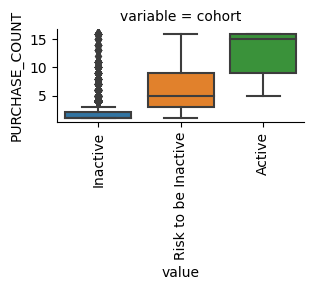

In [38]:
grouped = segment.loc[:,['PURCHASE_COUNT', 'cohort']].groupby(['cohort']).mean().sort_values(by='PURCHASE_COUNT')
def boxplot(x,y,**kwargs):
            sns.boxplot(x=x,y=y,order=grouped.index)
            x = plt.xticks(rotation=90)

cat = ['cohort']
p = pd.melt(segment, id_vars='PURCHASE_COUNT', value_vars=cat)
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False)
g = g.map(boxplot, 'value','PURCHASE_COUNT')
g

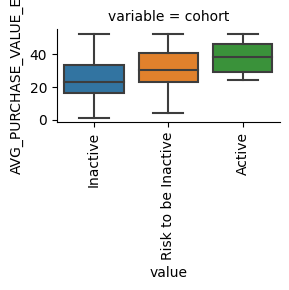

In [39]:
grouped = segment.loc[:,['AVG_PURCHASE_VALUE_EUR', 'cohort']].groupby(['cohort']).mean().sort_values(by='AVG_PURCHASE_VALUE_EUR')

cat = ['cohort']
p = pd.melt(segment, id_vars='AVG_PURCHASE_VALUE_EUR', value_vars=cat)
g = sns.FacetGrid (p, col='variable', col_wrap=1, sharex=False, sharey=False)
g = g.map(boxplot, 'value','AVG_PURCHASE_VALUE_EUR')
g

In [40]:
segment_agg = segment.groupby('cohort').agg({
    'recency': 'mean',
    'PURCHASE_COUNT': 'mean',
    'TOTAL_PURCHASES_EUR': 'mean',
    'AVG_PURCHASE_VALUE_EUR': ['mean', 'count']
}).round(1).reset_index()

segment_agg['%'] = (segment_agg[('AVG_PURCHASE_VALUE_EUR','count')] / segment_agg[('AVG_PURCHASE_VALUE_EUR','count')].sum()) * 100
segment_agg.sort_values(by=('PURCHASE_COUNT','mean'))

cohort recency PURCHASE_COUNT TOTAL_PURCHASES_EUR  \
                          mean           mean                mean   
1             Inactive   303.6            2.0                50.9   
2  Risk to be Inactive    76.5            6.6               219.6   
0               Active    30.2           12.8               679.5   

  AVG_PURCHASE_VALUE_EUR                %  
                    mean count             
1                   25.8  6594  54.826640  
2                   31.8  4149  34.497381  
0                   38.1  1284  10.675979